In [305]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [306]:
#Question 1
"""I first imported the data from csv"""
prepro_energy_data = pd.read_csv('energy_data.csv')
prepro_weather_data = pd.read_csv('weather_data.csv')

In [307]:
"""Split the Date & Time column and merge the rows that have the same date"""
prepro_energy_data['Date & Time'] = pd.to_datetime(prepro_energy_data['Date & Time'])
prepro_energy_data['new_time'] = [d.time() for d in prepro_energy_data['Date & Time']]
prepro_energy_data['Date_Time'] = [d.date() for d in prepro_energy_data['Date & Time']]
energy = prepro_energy_data.groupby(by="Date_Time").sum()
energy.reset_index(inplace=True)

In [308]:
"""Merge the rows that have the same date"""
weather = prepro_weather_data.groupby(prepro_weather_data.index // 24).mean()
prepro_weather_data['time'] = pd.to_datetime(prepro_weather_data['time'], unit='s')
prepro_weather_data['new_time'] = [d.time() for d in prepro_weather_data['time']]
prepro_weather_data['Date'] = [d.date() for d in prepro_weather_data['time']]
weather_new = prepro_weather_data.groupby(by="Date").mean()
weather_new.reset_index(inplace=True)

In [321]:
"""Merge energy and weather dataset"""
sub_energy = energy[["Date_Time", "use [kW]"]]
sub_energy.columns = ["Date_Time", "use_kW_"]

result = pd.concat([sub_energy, weather_new], axis=1, join="inner")
merged_data = result.drop(['Date'], axis=1)
merged_data

,Date_Time,use_kW_,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,35.046127,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
361,2014-12-28,37.695824,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
362,2014-12-29,28.675929,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000
363,2014-12-30,31.514313,24.846667,0.488750,9.998333,1026.102083,7.566667,0.031250,312.041667,0.000000,7.772083,0.000000


In [322]:
#Question 2
"""Split the data into training and testing set, testing includes December and training the rest"""
split_date = datetime.date(2014,12,1)
training_set = merged_data.loc[merged_data['Date_Time'] < split_date]
testing_set = merged_data.loc[merged_data['Date_Time'] >= split_date]
training_set

,Date_Time,use_kW_,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...
329,2014-11-26,27.712850,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
330,2014-11-27,30.114004,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
331,2014-11-28,26.348404,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667
332,2014-11-29,20.241298,22.344583,0.706667,9.793750,1025.543750,4.299167,0.049167,230.375000,0.000000,13.982083,0.000000


In [312]:
#Question 3
"""Made a linear model using training set"""
x = training_set[["temperature", "humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"]]
x = x.values
y = training_set.use_kW_.values
y = y.reshape(length, 1)
linear = LinearRegression().fit(x, y)

In [313]:
"""Made a prediction using model and test data"""
test = testing_set[["temperature", "humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"]]
test_predicts = linear.predict(test)

In [314]:
"""Calculated the root mean squared error"""
MSE = mean_squared_error(y_true = testing_set.use_kW_.values, y_pred = test_predicts)
MSE**(0.5)

8.740566311137641

In [315]:
"""Exported the predictions as csv"""
date = testing_set.Date_Time.values
df = pd.DataFrame(date, 
             columns=['Date_Time'])
df["Predicted_value"] = test_predicts
df.to_csv("cse351_hw2_yarma_seniha_111732218_linear_regression.csv")

In [316]:
#Question 4
"""Made a training and testing data"""
training = training_set[["Date_Time", "humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"]]
training.insert(1, "Temperature", training_set["temperature"].apply(lambda x: 0 if x<35 else 1), True)
testing =  testing_set[["Date_Time", "humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"]]
testing.insert(1, "Temperature", testing_set["temperature"].apply(lambda x: 0 if x<35 else 1), True)

In [317]:
"""Made a logistic model using training data, prediction using testing data, and then calculated the F1 score"""
x = training[["humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"]]
y = training.Temperature.values
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(x, y)

test = testing[["humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"]]
logistic_pred = logistic.predict(test)
logistic_pred

fScore = f1_score(testing.Temperature.values, logistic_pred)
fScore

0.6486486486486487

In [318]:
"""Exported the predictions as csv"""
date = testing.Date_Time.values
df = pd.DataFrame(date, 
             columns=['Date_Time'])
df["Predicted_value"] = logistic_pred
df.to_csv("cse351_hw2_yarma_seniha_111732218_logistic_regression.csv")

In [303]:
#Question 5
"""Divided the datasets into day and night, then created day, month and year column 
to show the difference between day and night more clearly. Showed result month by month"""
mask = (pd.to_timedelta(prepro_energy_data['new_time'].astype(str))
          .between(pd.Timedelta('06:00:00'), pd.Timedelta('18:30:00')))
day = prepro_energy_data[mask]
day = day.groupby(by="Date_Time").sum()
day.reset_index(inplace=True)
day["Date_Time"] = pd.to_datetime(day.Date_Time, format='%Y-%m-%d')
day['day'] = day['Date_Time'].dt.day
day['month'] = day['Date_Time'].dt.month
day['year'] = day['Date_Time'].dt.year
day = day.groupby(by="month").sum()
day.reset_index(inplace=True)

In [304]:
night = prepro_energy_data[~mask]
night = night.groupby(by="Date_Time").sum()
night.reset_index(inplace=True)
night["Date_Time"] = pd.to_datetime(night.Date_Time, format='%Y-%m-%d')
night['day'] = night['Date_Time'].dt.day
night['month'] = night['Date_Time'].dt.month
night['year'] = night['Date_Time'].dt.year
night = night.groupby(by="month").sum()
night.reset_index(inplace=True)

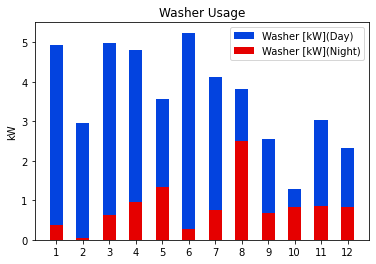

In [319]:
"""Created a graph to show the usage of washer during day time and night time. As it can be seen on the graph, 
daytime usage is much more than night time. Only during August and October, difference is less than 50%. So, we 
can conclude that people prefer to use washer in daytime."""
fig, ax = plt.subplots()

months = day['month']
x = np.arange(len(months))
width = 0.5

ax.bar(x, day['Washer [kW]'], width, label='Washer [kW](Day)', color='#0343df')
ax.bar(x, night['Washer [kW]'], width, label='Washer [kW](Night)', color='#e50000')

ax.set_ylabel('kW')
ax.set_title('Washer Usage')
ax.set_xticks(x)  
ax.set_xticklabels(months.astype(str).values, rotation=0)
ax.legend()

plt.show()

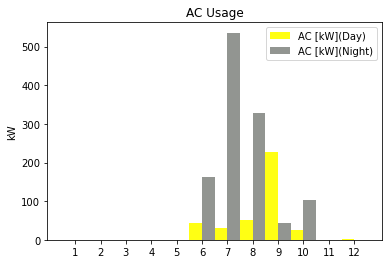

In [320]:
"""Created a graph to show the usage of AC during day time and night time. As it can be seen on the graph, 
nigth time usage is generally more than daytime. Only during September, daytime usage exceeds night. We can also 
see AC only used in those five months and maximum usage is seen in July. So overall we 
can conclude that people prefer to use AC in night time."""
fig, ax = plt.subplots()

months = day['month']
x = np.arange(len(months))
width = 0.5

ax.bar(x - .5*width, day["AC [kW]"], width, label='AC [kW](Day)', color='#ffff14')
ax.bar(x + .5*width, night['AC [kW]'], width, label='AC [kW](Night)', color='#929591')

ax.set_ylabel('kW')
ax.set_title('AC Usage')
ax.set_xticks(x)
ax.set_xticklabels(months.astype(str).values, rotation=0)
ax.legend()

plt.show()